In [ ]:
#ПЕРВАЯ ЧЕРНОВАЯ ВЕРСИЯ

In [647]:
import re
import pandas as pd
import folium
import folium.plugins as plugins
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns
import plotly.express as px

In [569]:
#открываем файл с данными в виде списка строк

with open("1.txt", encoding = "utf-8") as my_file:
    lines = my_file.readlines()
    my_file.close()

In [570]:
lines[:15]

['1\n',
 'Автор: Г.Г. Кривошеина.\n',
 'Тема: «Влияние факторов физической терапии на нейро-гальванический рефлекс. Часть 1»\n',
 'Учреждение: Самостоятельный курс физиотерапии 1ЛМИ им. академика И.П. Павлова.\n',
 'Руководитель: Зав. – проф. д-р мед.наук Е.Т. Залькиндсон.\n',
 'Город: Ленинград\n',
 'Год: 1940 г.\n',
 'Количество страниц: Стр. 325.\n',
 'Размер: 29,3 x 20,5 x 4,2 см\n',
 '\n',
 '2\n',
 'Автор: Г.Г. Воккен.\n',
 'Тема: «Закономерности дифференцировки костного скелета млекопитающих. Рентгеноанатомическое исследование».\n',
 'Учреждение: Центральный Рентгенологический, Радиологический и Раковый Институт/ Минздрав СССР. Отделение нормальной и сравнительной анатомии\n',
 'Руководитель: Засл.деят.науки проф. М.И. Неменов / Проф. М.Г. Привес.\n']

In [571]:
#Объявление класса Диссертация с атрибутами, для того, чтобы создать датафрейм

# class Dissert():
#     index_id = []
#     index_name = []
#     index_topic = []
#     index_city = []
#     index_year = []
#     index_page = []
#     index_size = []

#     @classmethod
#     def get_indexx(cls, lines):
#         for x in range(0, 849, 10):
#             id_num = lines[x]
#             trans_table = str.maketrans({'\n': ''})
#             number = id_num.translate(trans_table)
#             Dissert.index_id.append('Disser_'+str(number))
#         for x in range(1, 849, 10):  # индексы, в которых лежат имена авторов
#             Dissert.index_name.append(x)
#         for x in range(2, 849, 10):
#             Dissert.index_topic.append(x)
#         for x in range(5, 849, 10):  # индексы, в которых лежат города
#             Dissert.index_city.append(x)
#         for x in range(6, 849, 10):  # индексы, в которых лежат года
#             Dissert.index_year.append(x)
#         for x in range(7, 849, 10): #индексы, в которых лежат номера страниц
#             Dissert.index_page.append(x)    
#         for x in range(8, 849, 10):
#             Dissert.index_size.append(x) #индексы, в которых лежат размеры

    

#     def __init__(self, id_num, name, topic, city, lat, lon, year, page, size, height, wight, thickness):
#         self.id_name = id_num
#         self.name = name
#         self.topic = topic
#         self.city = city
#         self.lat = lat
#         self.lon = lon
#         self.year = year
#         self.page = page
#         self.size = size
#         self.heigt = height
#         self.wight = wight
#         self.thickness = thickness
#         return

    # def get_entity(self, name):
    #     ls_name = []
    #     for i in index_name:
    #     search_name = lines[i]
    #     # print(search_name)
    #     name = re.findall(pattern, search_name)
    #     #print(name)
    #     ls_name.append(name[0])
    #     return ls_name

    
    # def get_names():

# "Author", "Topic", "City", "Lat", "Long", "Year", "Page_Num", "Height", "Wight", "Thickness"

In [455]:
# name = [Dissert(f"Диссертация_{y}") for y in index_name]
# for x in range(85):
#     print(f"Объект_{x}: ", name[x].name)
    

TypeError: __init__() missing 11 required positional arguments: 'name', 'topic', 'city', 'lat', 'lon', 'year', 'page', 'size', 'height', 'wight', and 'thickness'

In [350]:
#print(len(lines)) - Отладочное

849


In [572]:
#Поиск ФИО с обычной и двойной фамилией
pattern = "(?:[А-ЯЁ]\.[А-ЯЁ]\.\s[А-ЯЁ][а-яё]+)(?:-[А-ЯЁ][а-яё]+)*" #регулярка для поиска ФИО 
# ?: для группировки в функциях re findall и match

In [426]:
#ID_INDEXES
index_id = []
for x in range(0, 849, 10):
    id_num = lines[x]
    trans_table = str.maketrans({'\n': ''})
    number = id_num.translate(trans_table)
    index_id.append(number)

In [427]:
#Отладочное
# index_id[:10]

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

In [352]:
#NAMES_INDEXES
index_name = []
for x in range(1, 849, 10):  # индексы, в которых лежат имена авторов
        index_name.append(x)

In [388]:
#TOPIC_INDEXES
index_topic = []
for x in range(2, 849, 10):
    index_topic.append(x)

In [362]:
#CITY_INDEXES
index_city = []
for x in range(5, 849, 10):  # индексы, в которых лежат города
        index_city.append(x)

In [353]:
#YEAR_INDEXES
index_year = []
for x in range(6, 849, 10):  # индексы, в которых лежат года
        index_year.append(x)

In [354]:
#PAGE_INDEXES
index_page = []
for x in range(7, 849, 10): #индексы, в которых лежат номера страниц
    index_page.append(x)


In [373]:
#SIZE_INDEXES
index_size = []
for x in range(8, 849, 10):
    index_size.append(x)

In [600]:
#NAME_LIST - парсинг на извлечение имен
def get_names():
    ls_name = []
    for i in index_name:
        search_name = lines[i]
        # print(search_name)
        name = re.findall(pattern, search_name)
        #print(name)
        ls_name.append(name[0])
    return ls_name

#TOPIC_LIST - парсинг на извлечение названий диссертационных работ
def get_topic():
    ls_topic = []
    for i in index_topic:
        search_topic = lines[i]
        finder = search_topic[6:]
        trans_table = str.maketrans({'\n': '', '«': '', '»': ''})
        topic = finder.translate(trans_table)
        ls_topic.append(topic)
    return ls_topic

#CITY_LIST - парсинг на извлечение названий городов
def get_city():
    ls_city = []
    for i in index_city:
        search_city = lines[i]
        finder = search_city[7:]
        trans_table = str.maketrans({'\n': '', ' ': ''})
        city = finder.translate(trans_table)
        ls_city.append(city)
    return ls_city

#YEAR_LIST парсинг на извлечение цифры года защиты
def get_year():
    ls_year = []
    for i in index_year:
        search_year = lines[i]
        patt = re.findall("\d+", search_year)
        if search_year == 'Год: нет\n':
            ls_year.append(0)
        else:
            ls_year.append(int(patt[0]))
    return ls_year

#PAGE_LIST парсинг на извлечение количества страниц
def get_pages():
    ls_page = []
    for i in index_page:
        search_page = lines[i]
        patt2 = re.findall("\d+", search_page)
        if search_page == 'Количество страниц: нет\n':
            ls_page.append(0)
        else:
            ls_page.append(int(patt2[0]))
    return ls_page 

In [601]:
#функции создают очищенные списки с объектами, характеризующими диссертации
ls_name = get_names()
ls_theme = get_topic()
ls_city = get_city()
ls_year = get_year()
ls_page = get_pages()

In [602]:
#SIZE_LISTS парсинг на извлечение размеров книги -  ширина, длина, толщина

ls_height = []
ls_wight = []
ls_thickness = []

for i in index_size:
    search_size = lines[i]
    rep_comma = re.sub(',', '.', search_size)
    height = rep_comma[8:12]
    wigth = rep_comma[15:19]
    thickness = rep_comma[22:25]
    ls_height.append(float(height))
    ls_wight.append(float(wigth))
    ls_thickness.append(float(thickness))

In [574]:
#TOPIC_LIST - парсинг на извлечение названий диссертационных работ
ls_topic = []
for i in index_topic:
    search_topic = lines[i]
    finder = search_topic[6:]
    trans_table = str.maketrans({'\n': '', '«': '', '»': ''})
    topic = finder.translate(trans_table)
    ls_topic.append(topic)

In [575]:
#CITY_LIST - парсинг на извлечение названий городов
ls_city = []
for i in index_city:
    search_city = lines[i]
    finder = search_city[7:]
    trans_table = str.maketrans({'\n': '', ' ': ''})
    city = finder.translate(trans_table)
    ls_city.append(city)

In [576]:
#YEAR_LIST парсинг на извлечение цифры года защиты
ls_year = []
for i in index_year:
    search_year = lines[i]
    patt = re.findall("\d+", search_year)
    if search_year == 'Год: нет\n':
        ls_year.append(0)
    else:
        ls_year.append(int(patt[0]))

In [577]:
#PAGE_LIST парсинг на извлечение количества страниц
ls_page = []
for i in index_page:
    search_page = lines[i]
    patt2 = re.findall("\d+", search_page)
    if search_page == 'Количество страниц: нет\n':
        ls_page.append(0)
    else:
        ls_page.append(int(patt2[0]))

In [578]:
#SIZE_LISTS парсинг на извлечение размеров книги -  ширина, длина, толщина
ls_height = []
ls_wight = []
ls_thickness = []

for i in index_size:
    search_size = lines[i]
    rep_comma = re.sub(',', '.', search_size)
    height = rep_comma[8:12]
    wigth = rep_comma[15:19]
    thickness = rep_comma[22:25]
    ls_height.append(float(height))
    ls_wight.append(float(wigth))
    ls_thickness.append(float(thickness))


In [579]:
#Отладочное
print(ls_height[:20])
print(ls_wight[:20])
print(ls_thickness[:20])

[29.3, 30.0, 31.0, 32.0, 28.7, 29.5, 29.0, 31.0, 31.0, 30.0, 30.3, 29.5, 30.0, 30.3, 29.0, 29.0, 28.3, 30.0, 29.3, 29.5]
[20.5, 21.3, 23.0, 22.0, 20.8, 21.5, 21.0, 21.5, 21.5, 20.4, 22.2, 21.5, 20.4, 21.0, 20.0, 20.2, 20.5, 21.0, 21.5, 20.8]
[4.2, 6.5, 4.0, 2.0, 6.0, 5.5, 3.5, 3.0, 7.0, 3.3, 2.3, 2.0, 3.5, 1.5, 1.7, 2.0, 3.3, 1.5, 2.5, 4.0]


In [604]:
#Отладочное
print(ls_city[40:50])

['Ленинград', 'Ленинград', 'Москва', 'Ленинград', 'Ленинград', 'Улан-Батор', 'Ярославль', 'Ленинград', 'Ленинград', 'Ленинград']


In [605]:
#КООРДИНАТЫ
#ручной геокодер
latitude = []
longitude = []
for item in ls_city:
    if item == 'Ленинград':
        lat = '59.9399139'
        lon = '29.5342825'
        latitude.append(lat)
        longitude.append(lon)
    elif item == 'Москва':
        lat = '55.5815244'
        lon = '36.8251221'
        latitude.append(lat)
        longitude.append(lon)
    elif item == 'Улан-Батор':
        lat = '47.8915226'
        lon = '106.6147912'
        latitude.append(lat)
        longitude.append(lon)
    elif item == 'Ярославль':
        lat = '57.6525648'
        lon = '39.7244351'
        latitude.append(lat)
        longitude.append(lon)
    elif item == 'Хабаровск':
        lat = '48.4649872'
        lon = '134.9733436'
        latitude.append(lat)
        longitude.append(lon)
    elif item == 'Аджари':
        lat = '41.6027467'
        lon = '41.559067'
        latitude.append(lat)
        longitude.append(lon)
    elif item == 'Пенза':
        lat = '53.1952765'
        lon = '44.8905378'
        latitude.append(lat)
        longitude.append(lon)
    elif item == 'Тбилиси':
        lat = '41.7326304'
        lon = '44.6987687'
        latitude.append(lat)
        longitude.append(lon)
    elif item == 'Ижевск':
        lat = '56.8639188'
        lon = '53.0880185'
        latitude.append(lat)
        longitude.append(lon)
    elif item == 'Таллин':
        lat = '59.4717925'
        lon = '24.5981598'
        latitude.append(lat)
        longitude.append(lon)
    else:
        lat = '-73.647250' #антарктида, если отсутствует название города
        lon = '17.554224'
        latitude.append(lat)
        longitude.append(lon)


In [599]:
#Отладочное
latitude[40:50]

['59.9399139',
 '59.9399139',
 '55.5815244',
 '59.9399139',
 '59.9399139',
 '47.8915226',
 '57.6525648',
 '59.9399139',
 '59.9399139',
 '59.9399139']

In [361]:
#Отладочное
print(ls_page[:20])

[325, 577, 298, 131, 376, 390, 190, 186, 283, 198, 130, 46, 254, 138, 160, 192, 200, 98, 184, 308]


In [606]:
#СОЗДАНИЕ ДАТАФРЕЙМА
df = pd.DataFrame(list(zip(ls_name, ls_topic, ls_city, latitude, longitude, ls_year, ls_page, ls_height, ls_wight, ls_thickness)), 
columns= ["Author", "Topic", "City", "Lat", "Long", "Year", "Page_Num", "Height", "Wight", "Thickness"])

In [607]:
df[40:50]

,Author,Topic,City,Lat,Long,Year,Page_Num,Height,Wight,Thickness
40,Л.С. Ротфельд,Изменения в белковой картине крови в процессе ...,Ленинград,59.9399139,29.5342825,1945,206,28.0,21.3,3.2
41,И.О. Нарбутович,Экспериментально-клинические исследования изме...,Ленинград,59.9399139,29.5342825,1940,386,29.8,20.5,4.0
42,М.Х. Бергольц,Унитарные экстракты сердечной группы и фармако...,Москва,55.5815244,36.8251221,1940,328,28.8,20.4,4.8
43,И.С. Брейдо,К истории антисептики и асептики в России,Ленинград,59.9399139,29.5342825,1949,387,29.5,20.5,4.8
44,А.Ю. Щодро-Яковенко,Гигиеническая оценка светового режима естестве...,Ленинград,59.9399139,29.5342825,1947,254,29.3,20.8,2.8
45,М.А. Акулин,Материалы к учению о четвертой венерической б...,Улан-Батор,47.8915226,106.6147912,1945,200,34.5,26.8,4.2
46,Н.А. Левин,Возрастные особенности костного лабиринта чело...,Ярославль,57.6525648,39.7244351,1949,190,28.8,21.0,5.0
47,А.Л. Шнирман,Механизмы взаимодействия в сочетательно-рефлек...,Ленинград,59.9399139,29.5342825,0,110,35.5,22.5,2.0
48,Т.А. Коростелева,"О концентрации витаминов В1, С и Каротина в кр...",Ленинград,59.9399139,29.5342825,1946,146,28.5,22.5,1.5
49,Э.А. Горницкая,Этиология и патогенез гемморагических колитов,Ленинград,59.9399139,29.5342825,1936,497,30.0,21.0,5.5


In [610]:
#Визуализация городов, из которых диссертации попали в фонд ПСПбГМУ. 
city_map = df["City"]
lat_map = df["Lat"]
long_map = df["Long"]

map = folium.Map(location = [47.6690973, 57.9315316], zoom_start = 4) #создаем карту и подложку

tilelayer = folium.TileLayer(tiles='Stamen Terrain', name='Stamen Terrain') #overlay = True
tilelayer.add_to(map)

folium.LayerControl().add_to(map) #добавляем контроль слоев

measure = plugins.MeasureControl(position='topright', primary_length_unit = 'meters').add_to(map) #добавляем линейку

In [611]:
for city_map, lat_map, long_map in zip(city_map, lat_map, long_map):
    folium.CircleMarker(location=[lat_map, long_map], #добавляем данные датафрейма в карту + стиль отображения
    popup = city_map,
    fill = True,
    color = "green"
    # icon=folium.Icon(color = 'green', icon='info-sign')
    ).add_to(map)

In [612]:
map

In [394]:
#Отладочное
df.City.unique()

array(['Ленинград', 'нет', 'Москва', 'Улан-Батор', 'Ярославль',
       'Хабаровск', 'Аджари', 'Пенза', 'Тбилиси', 'Ижевск', 'Таллин'],
      dtype=object)

In [494]:
def cm_to_inch(value):
    return value/2.54

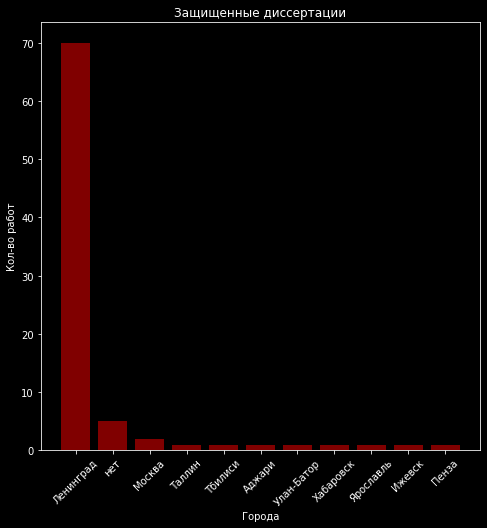

In [645]:
#Получаем переменную с количеством диссертаций из того или иного города, создавая новый датафрейм из Series
city_count = df["City"].value_counts().reset_index()

c = city_count["index"]
m = city_count["City"]

plt.figure(figsize=(cm_to_inch(20),cm_to_inch(20)))
plt.bar(c, m, color = "maroon", linewidth = 0.1)
plt.title("Защищенные диссертации")
plt.xlabel("Города")
plt.ylabel("Кол-во работ")
plt.xticks(rotation = 45)

plt.show()

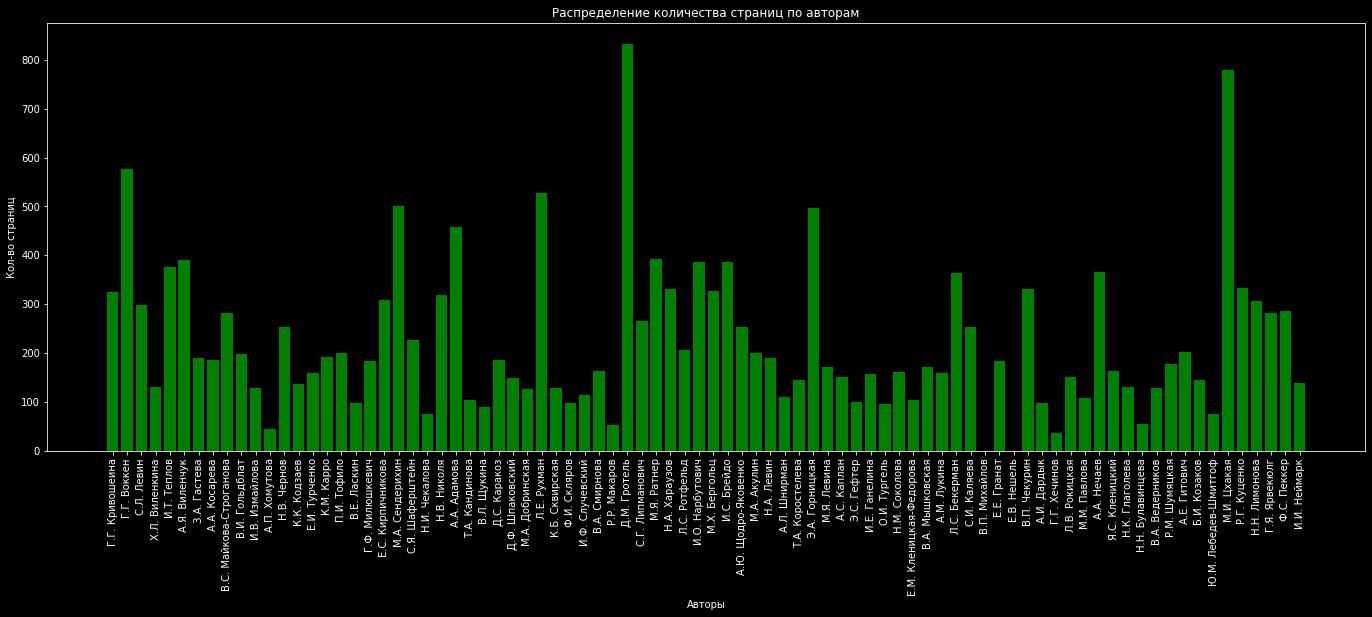

In [548]:
#Визуализация количества страниц по авторам
x = df["Author"]
y = df["Page_Num"]
plt.figure(figsize=(cm_to_inch(60),cm_to_inch(20)))
plt.bar(x, y, color = "green", linewidth = 0.1)
plt.title("Распределение количества страниц по авторам")
plt.xlabel("Авторы")
plt.ylabel("Кол-во страниц")
plt.xticks(rotation = 90)

plt.show()

In [658]:
#создаем колонку датафрейма Volume, которая показывает объем каждой книги в см3
df["Volume"] = df["Height"] * df["Wight"] * df["Thickness"]

In [659]:
df.head(5)

,Author,Topic,City,Lat,Long,Year,Page_Num,Height,Wight,Thickness,Volume
0,Г.Г. Кривошеина,Влияние факторов физической терапии на нейро-г...,Ленинград,59.9399139,29.5342825,1940,325,29.3,20.5,4.2,2522.73
1,Г.Г. Воккен,Закономерности дифференцировки костного скелет...,Ленинград,59.9399139,29.5342825,1949,577,30.0,21.3,6.5,4153.50
2,С.Л. Левин,Безусловные рефлексы слюнных желез при опухоле...,Ленинград,59.9399139,29.5342825,1944,298,31.0,23.0,4.0,2852.00
3,Х.Л. Виленкина,Гигиеническая оценка детских садов Ленинграда.,Ленинград,59.9399139,29.5342825,1939,131,32.0,22.0,2.0,1408.00
4,И.Т. Теплов,Скорость кровообращения у человека в нормальны...,Ленинград,59.9399139,29.5342825,1938,376,28.7,20.8,6.0,3581.76


In [706]:
df_by_volume = df.groupby("Year")["Volume"].sum()
year_group = df_by_volume.reset_index() 
#- отсортированные значения volume - объем книг от ранних лет защиты к поздним

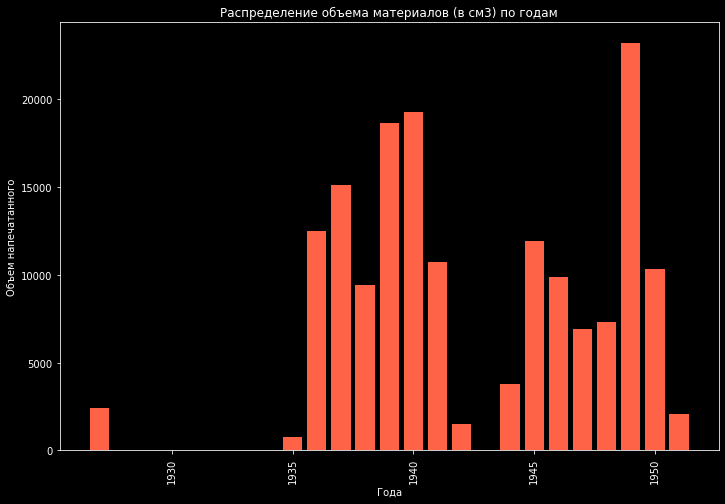

In [734]:
for_plot = year_group.drop(labels = [0], axis = 0) #убираем значения, где год неизвестен
j = for_plot["Year"]
k = for_plot["Volume"]
plt.figure(figsize=(cm_to_inch(30),cm_to_inch(20)))
plt.bar(j, k, color = "tomato", linewidth = 0.1)
plt.title("Распределение объема материалов (в см3) по годам")
plt.xlabel("Года")
plt.ylabel("Объем напечатанного")
plt.xticks(rotation = 90)

plt.show()

In [732]:
for_plot.head(5)
#1,5 м3 в 1937 году.Плотность бумаги очень примерно - 500-600 кг на 1 м3, то есть примерно 800 кг диссертаций в 1937 г.

,Year,Volume
1,1927,2443.600
2,1935,740.600
3,1936,12524.580
4,1937,15144.218
5,1938,9438.240


In [742]:
#Посмотрим, на какие темы написали меньше и больше всего страниц
df_by_topic = df.groupby("Page_Num")["Topic"].max()
topic_groups = df_by_topic.reset_index()

<AxesSubplot:>

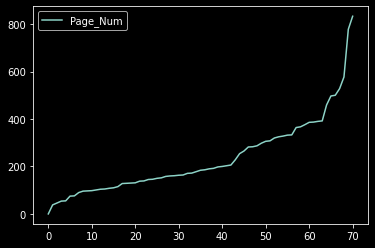

In [743]:
#общий график показывает, что  средний объем страниц в диссертациях медиков за 1930-1940-е = между 200 и 400 стр. машинописного текста
topic_groups.plot()

In [757]:
#темы с наименьшим количеством страниц
header = topic_groups[1:6]
#темы с наибольшим количеством страниц
footer = topic_groups[66:]



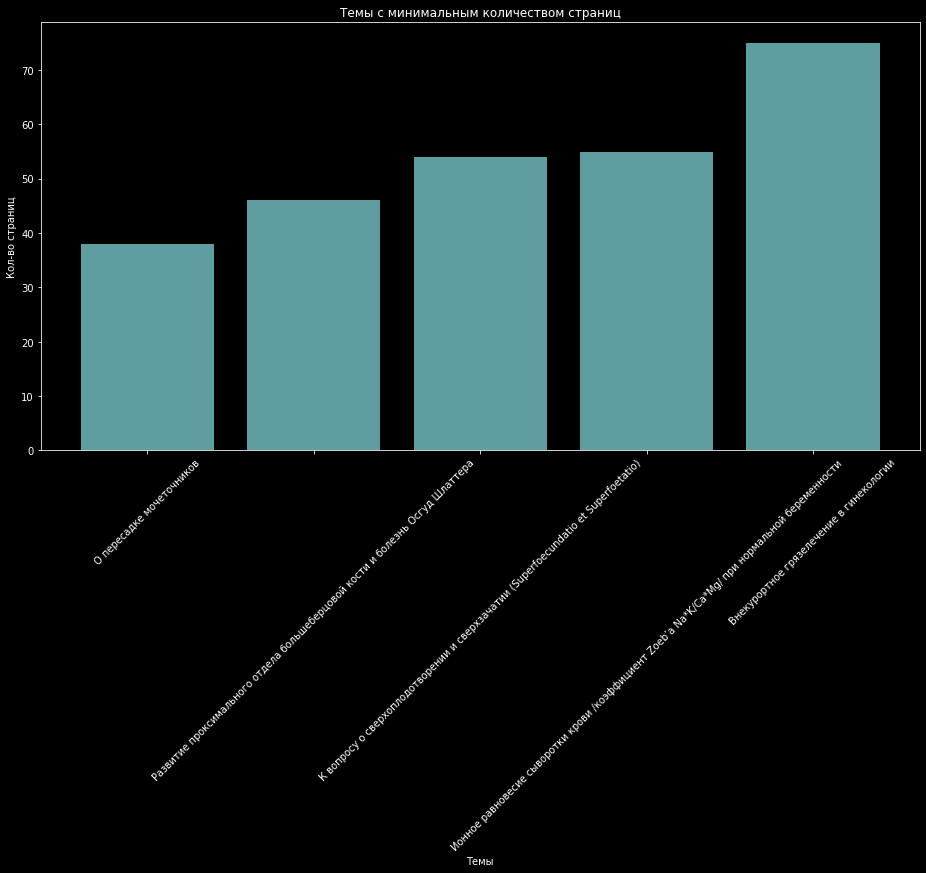

In [760]:
dd = header["Topic"]
rr = header["Page_Num"]
plt.figure(figsize=(cm_to_inch(40),cm_to_inch(20)))
plt.bar(dd, rr, color = "#5F9EA0", linewidth = 0.1)
plt.title("Темы с минимальным количеством страниц")
plt.xlabel("Темы")
plt.ylabel("Кол-во страниц")
plt.xticks(rotation = 45)

plt.show()

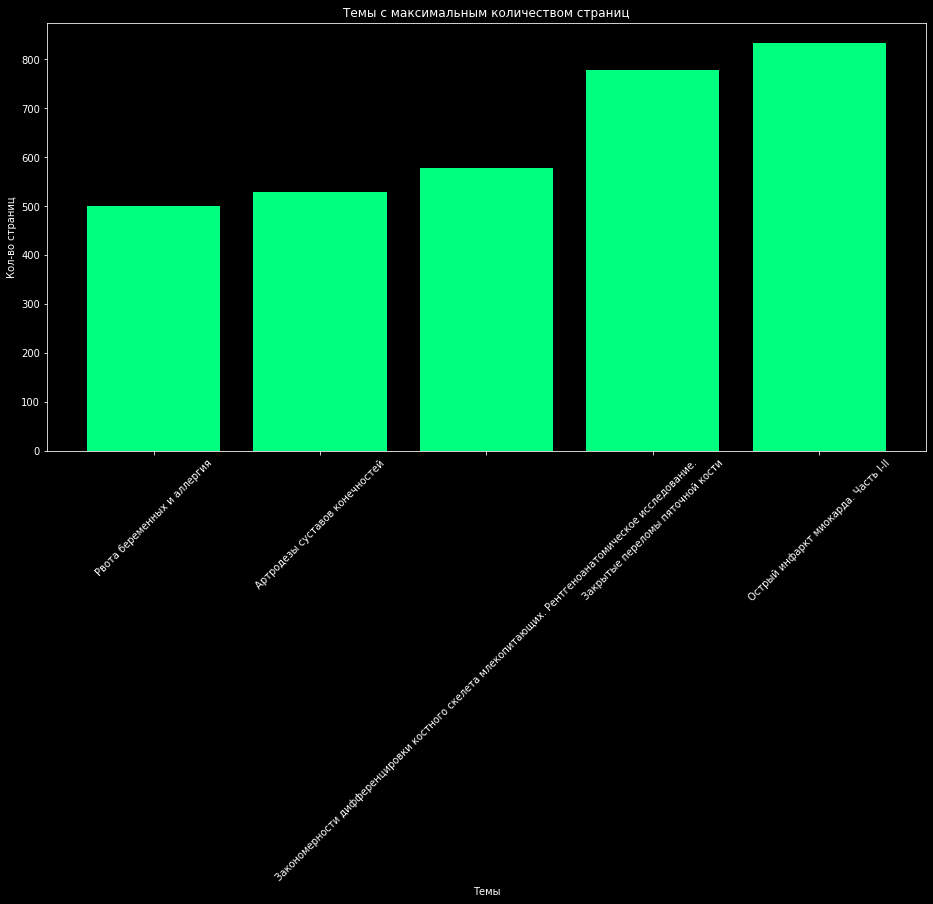

In [761]:
ss = footer["Topic"]
ff = footer["Page_Num"]
plt.figure(figsize=(cm_to_inch(40),cm_to_inch(20)))
plt.bar(ss, ff, color = "#00FF7F", linewidth = 0.1)
plt.title("Темы с максимальным количеством страниц")
plt.xlabel("Темы")
plt.ylabel("Кол-во страниц")
plt.xticks(rotation = 45)

plt.show()

In [762]:
footer

,Page_Num,Topic
66,500,Рвота беременных и аллергия
67,528,Артродезы суставов конечностей
68,577,Закономерности дифференцировки костного скелет...
69,778,Закрытые переломы пяточной кости
70,833,Острый инфаркт миокарда. Часть I-II


In [763]:
header

,Page_Num,Topic
1,38,О пересадке мочеточников
2,46,Развитие проксимального отдела большеберцовой ...
3,54,К вопросу о сверхоплодотворении и сверхзачатии...
4,55,Ионное равновесие сыворотки крови /коэффициент...
5,75,Внекурортное грязелечение в гинекологии


In [655]:
#Создаем датафрейм
year_count = df["Year"].value_counts().reset_index()
yind = year_count['index']
yy = year_count['Year']

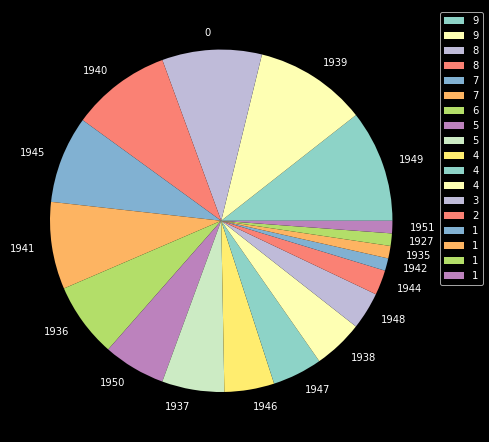

In [644]:
#Визуализация количества защищенных диссертаций по годам
fig1, ax1 = plt.subplots(figsize=(cm_to_inch(20),cm_to_inch(20)))
ax1.pie(yy, labels=yind)
ax1.legend(yy, loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

In [527]:
# temp_df = pd.DataFrame(year_count, columns=['count'])

In [ ]:
# final_df = pd.concat([df,new_df],axis=1)

In [69]:
# Преобразование списка в одну строку
# str1 = ""

# for item in lines:
#     str1 += str(item) + " "

# print(str1[:600])

1
 Автор: Г.Г. Кривошеина.
 Тема: «Влияние факторов физической терапии на нейро-гальванический рефлекс. Часть 1»
 Учреждение: Самостоятельный курс физиотерапии 1ЛМИ им. академика И.П. Павлова.
 Руководитель: Зав. – проф. д-р мед.наук Е.Т. Залькиндсон.
 Город: Ленинград
 Год: 1940 г.
 Количество страниц: Стр. 325.
 Размер: 29,3 x 20,5 x 4,2 см
 
 2
 Автор: Г.Г. Воккен.
 Тема: «Закономерности дифференцировки костного скелета млекопитающих. Рентгеноанатомическое исследование».
 Учреждение: Центральный Рентгенологический, Радиологический и Раковый Институт/ Минздрав СССР. Отделение нормальной и ср
